# Projects -Optimizing Retail Banking Strategies Through RFM-Based Customer Segmentation

## 04 – RFM Feature Engineering

In this step, we engineer the three core **RFM features** (Recency, Frequency, and Monetary) used in customer segmentation:

- **Recency (R):** How recently a customer made a transaction
- **Frequency (F):** How often they transact
- **Monetary (M):** How much money they spend

These values will serve as the foundation for scoring and clustering customers in the next step.

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [5]:
df = pd.read_csv('dataset/bank_data_C_cleanedv2.csv')

In [9]:
df.head()

,Unnamed: 0.1,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,age_group
0,0,0,T1,C5841053,1994-01-10 00:00:00.000000000,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,15–25
1,1,1,T2,C2142763,1957-04-04 00:00:00.000000000,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,46–60
2,2,2,T3,C4417068,1996-11-26 00:00:00.000000000,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,15–25
3,3,3,T4,C5342380,1973-09-14 00:00:00.000000000,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,36–45
4,4,4,T5,C9031234,1988-03-24 00:00:00.000000000,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,26–35


In [15]:
# Convert DOB and Transaction date to datetime object
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format = 'mixed', dayfirst = True, errors = 'coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = 'mixed', dayfirst = True, errors = 'coerce')

In [17]:
df.dtypes

Unnamed: 0.1                        int64
Unnamed: 0                          int64
TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
age                                 int64
age_group                          object
dtype: object

In [19]:
df.head()

,Unnamed: 0.1,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,age_group
0,0,0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,15–25
1,1,1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,46–60
2,2,2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,15–25
3,3,3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,36–45
4,4,4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,26–35


### Recency

How recently a customer made a transaction

In [26]:
# we start by calculating de recent date of transaction
recent_date = df['TransactionDate'].max()

recent_date

Timestamp('2016-10-21 00:00:00')

In [34]:
recency = df.groupby('CustomerID').agg({'TransactionDate': lambda x: ((recent_date - x.max()).days)+1})

In [117]:
recency.head()

,TransactionDate
CustomerID,
C1010011,26
C1010012,69
C1010014,76
C1010018,37
C1010024,65


**Frequency**

How often they transact

In [42]:
frequency = df.groupby('CustomerID').agg({'TransactionID': 'nunique'})

In [111]:
frequency.head()

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


**Monetary**

How much money they spend

In [47]:
monetary = df.groupby('CustomerID').agg({'TransactionAmount (INR)': 'sum'})

In [49]:
monetary.head()

,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


In [61]:
# Set reference date (e.g., one day after the latest transaction)
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency
    'TransactionID': 'nunique',                                    # Frequency
    'TransactionAmount (INR)': 'sum'                               # Monetary
}).reset_index()

In [62]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [71]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0


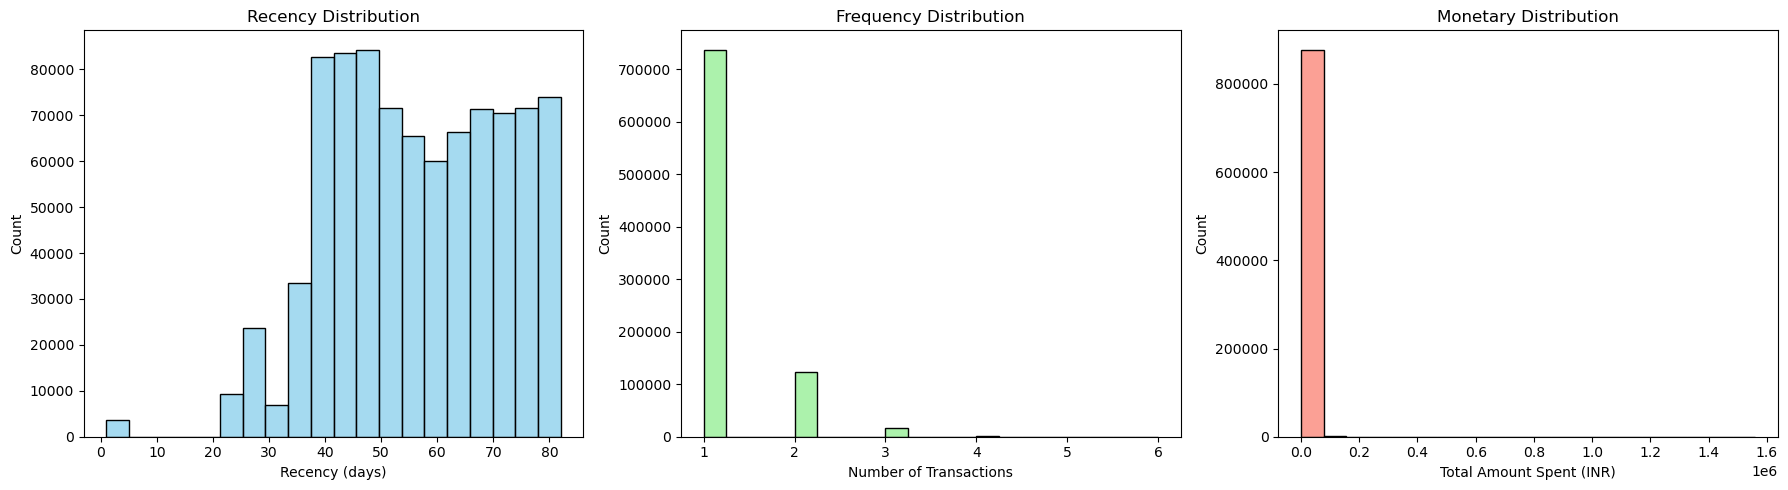

In [86]:
# 1. Histograms for R, F, and M
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Count')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=20, kde=False, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Count')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=20, kde=False, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Total Amount Spent (INR)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

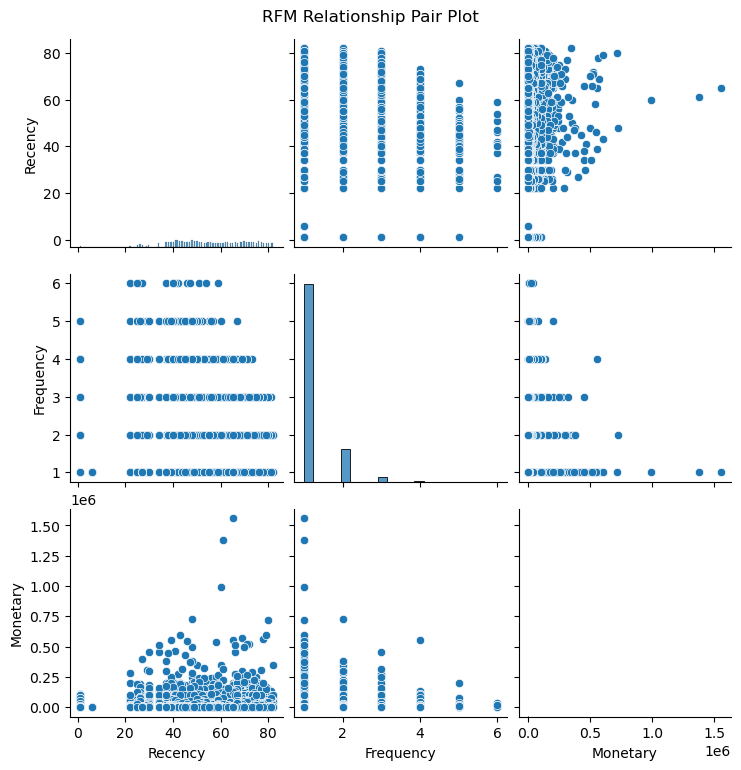

In [96]:
# 2. Pairplot for RFM Relationship
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']])
plt.suptitle('RFM Relationship Pair Plot', y=1.02)
plt.show()

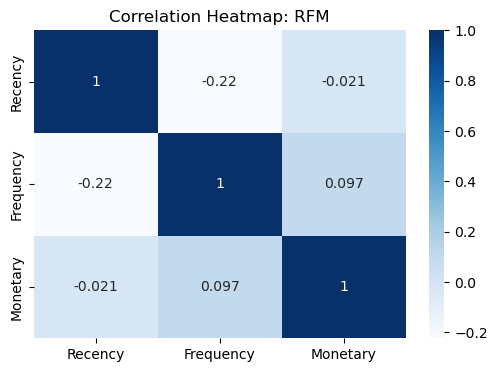

In [100]:
# 3. Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap: RFM')
plt.show()

In [104]:
rfm[['Recency', 'Frequency', 'Monetary']].corr()

,Recency,Frequency,Monetary
Recency,1.000000,-0.223293,-0.020675
Frequency,-0.223293,1.000000,0.097491
Monetary,-0.020675,0.097491,1.000000


In [106]:
rfm.to_csv('outputs/rfm_table.csv')